<a href="https://colab.research.google.com/github/DITHAAAA/Final-Project-1_Python-For-Data-Science/blob/main/PYTN_KampusMerdeka_fp1_Ditha_Tul_Nugraha_(Group2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project 1 : Ligear Regression**

Group 2

1.   Farizza Fikri Mumtaza (PYTN-KS20-03)
2.   Ilham Yusuf (PYTN-KS20-06)
3.   Ditha Tul Nugraha (PYTN-KS20-015)



# **A. Introduce**

Uber dan Lyft adalah sebuah aplikasi untuk memesan kendaraan online.
Dataset ini merupakan data riwayat pemesanan dari Uber dan Lyft.

Dari kolom-kolom dataset ini, kita menganalisis faktor-faktor yang mempengaruhi harga dari layanan Uber dan Lyft. Kita juga melakukan pemodelan menggunakan model Regresi Linear untuk memprediksi harga kedua metode transportasi tersebut. Selain itu, model Regresi Linear akan di bandingkan dengan model Random Forest Regressor tanpa hyperparameter tuning dan menggunakan hyperparameter tuning. Setelah melakukan 3 pemodelan, akan dilakukan model deployment dan inference menggunakan model dengan akurasi tertinggi.

# **B. Import Library**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import sys

import pickle

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')

 # **C. Load Data**

**Load dari csv ke dataframe**

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.00,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.00,0.68,8.66,9.17,1.545016e+09,10.000,43.68,1.544969e+09,34.19,1.545048e+09,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.00,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.00,0.94,11.98,11.98,1.543291e+09,4.786,47.30,1.543252e+09,42.10,1.543298e+09,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.00,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.00,0.75,7.33,7.33,1.543334e+09,10.000,47.55,1.543320e+09,33.10,1.543403e+09,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.00,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.73,5.28,5.28,1.543514e+09,10.000,45.03,1.543511e+09,28.90,1.543579e+09,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.00,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.70,9.14,9.14,1.543446e+09,10.000,42.18,1.543421e+09,36.71,1.543478e+09,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65250,dd003979-24bd-4ba2-ad73-31ccfd3af9b7,1.543493e+09,11,29,11,2018-11-29 11:58:00,America/New_York,Northeastern University,Theatre District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,8.0,1.91,1.00,42.2148,-71.0330,37.40,31.10,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.

**Check 5 data teratas**

In [3]:
df.head

<bound method NDFrame.head of                                          id     timestamp  hour  day  month  \
0      424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1      4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2      981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3      c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4      e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                     ...           ...   ...  ...    ...   
65250  dd003979-24bd-4ba2-ad73-31ccfd3af9b7  1.543493e+09    11   29     11   
65251  6b081ec2-4ae2-422d-a62a-132f25d7c7fe  1.544954e+09     9   16     12   
65252  022860a6-37a6-4443-8cc5-bbba39890f74  1.545005e+09     0   17     12   
65253  239765df-0091-474b-84e5-fa93bcc50f8f  1.544876e+09    12   15     12   
65254  bf76a471-58d5-498e-9e7c-c0a72f64d2ff  1.543850e+09    15    3     12   

                  dat

**Check Data Shape**

In [4]:
# Digunakan untuk mengecek kolom dan baris
df.shape

(65255, 57)

ada 57 kolom dan 693071 baris dari data tsb

**Check info data**

In [5]:
# Digunakan untuk mengecek info dari data
df.info

<bound method DataFrame.info of                                          id     timestamp  hour  day  month  \
0      424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1      4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2      981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3      c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4      e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                     ...           ...   ...  ...    ...   
65250  dd003979-24bd-4ba2-ad73-31ccfd3af9b7  1.543493e+09    11   29     11   
65251  6b081ec2-4ae2-422d-a62a-132f25d7c7fe  1.544954e+09     9   16     12   
65252  022860a6-37a6-4443-8cc5-bbba39890f74  1.545005e+09     0   17     12   
65253  239765df-0091-474b-84e5-fa93bcc50f8f  1.544876e+09    12   15     12   
65254  bf76a471-58d5-498e-9e7c-c0a72f64d2ff  1.543850e+09    15    3     12   

                  d

Data ini mempunyai kolom numerical (hour, day, month, price, distance, dsb) dan juga data categorical seperti id, destination, cab_type, name dsb.

# **Data Cleaning**

**Check Data Duplikat**

In [6]:
# Digunakan untuk mengecek data yang terduplikat
df.duplicated().sum()

0

tidak ada data yang terduplikat

**Menampilkan nilai unik kolom**

In [7]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

**Kolom yang akan dipakai**

*hour : kolom ini digunakan untuk mengetahui harga saat pemesanan layanan Uber atau Lyft. Dari kolom ini juga dapat diketahui  ada tidaknya peningkatan harga layanan pada waktu tertentu, misalnya rush hour.

*source : kolom ini digunakan untuk melihat lokasi paling banyak pelanggan memesan layanan Uber atau Lyft

*destination : kolom ini digunakan untuk melihat lokasi tujuan pelanggan layanan Uber atau Lyft

*cab_type : kolom ini digunakan untuk melihat jenis layanan yang digunakan , apakah itu Uber atau Lyft karena kedua layanan tersebut dapat memberikan harga yang berbeda.

*price : kolom ini  merupakan harga dari setiap pemesanan.

*distance : kolom ini  merupakan jarak dari awal lokasi pemesanan dan lokasi tujuan, dan biasanya jarak menentukan harga dari layanan Uber atau Lyft.

*surge_multiplier : kolom ini digunakan sebagai pengali untuk harga standar.

*name : kolom ini digunakan untuk mengetahui jenis mobil yang digunakan karena jenis mobil berpengaruh terhadap harga layanan)

Selain dari kolom tsb, kita tidak menggunakan kolom lain karena tidak relevan terhadap analisis, atau data yang disediakan tidak ada keterangan yang jelas untuk isi dari kolom tersebut.

In [8]:
data = df[['name', 'hour', 'source' ,'destination', 'cab_type',
              'price', 'distance', 'surge_multiplier']]
data

,name,hour,source,destination,cab_type,price,distance,surge_multiplier
0,Shared,9,Haymarket Square,North Station,Lyft,5.0,0.44,1.00
1,Lux,2,Haymarket Square,North Station,Lyft,11.0,0.44,1.00
2,Lyft,1,Haymarket Square,North Station,Lyft,7.0,0.44,1.00
3,Lux Black XL,4,Haymarket Square,North Station,Lyft,26.0,0.44,1.00
4,Lyft XL,3,Haymarket Square,North Station,Lyft,9.0,0.44,1.00
...,...,...,...,...,...,...,...,...
65250,WAV,11,Northeastern University,Theatre District,Uber,8.0,1.91,1.00
65251,Taxi,9,Theatre District,North End,Uber,NaN,1.80,1.00
65252,Lux Black,0,Beacon Hill,Northeastern University,Lyft,27.5,2.48,1.25
65253,Lux Black XL,12,Beacon Hill,Northeastern University,Lyft,38.5,2.48,1.25


**Check missing values**

In [9]:
# Digunakan untuk cek nilai yang hilang
data.isnull().sum()

name                   0
hour                   0
source                 0
destination            0
cab_type               0
price               5123
distance               0
surge_multiplier       0
dtype: int64

**Distribusi dari Price**

$H0$ : Harga dari Uber dan Lyft terdistribusi secara normal **||**
$H1$  : Harga dari Uber dan Lyft tidak terdistribusi secara normal

In [10]:
p_value = normal_ad(data['price'])
p_value

(nan, 0.0)

$H0$ ditolak karena p-value lebih kecil dari 0.05. Maka dari itu distribusi dari harga Uber dan Lyft tidak terdistribuse secara normal.

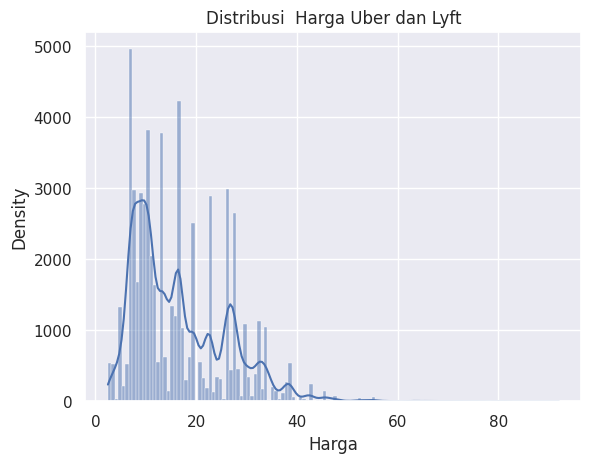

In [11]:
sns.histplot(data['price'], kde=True)  # Set kde=True for the KDE plot

# Customize the plot / modifikasi plot (optional)
plt.title('Distribusi  Harga Uber dan Lyft')
plt.xlabel('Harga')
plt.ylabel('Density')

# Display the plot / menampilkan plot (jika menggunakan Jupyter Notebook or IPython)
plt.show()

Dari visualisasi di atas, distribusi harga dari layanan Uber dan Lyft tergolong right skewed.

In [12]:
print('Mean :', data['price'].mean())
print('Median :', data['price'].median())

Mean : 16.55915319630147
Median : 13.5


Dari hasil pengecekan data di atas, terdapat 55095 data  null pada kolom price dikarenakan distribusi dari price tidak normal dan juga nilai mean dan median dari price memiliki selisih yang cukup signifikan, maka data null akan di impute oleh nilai median.

In [13]:
data['price'].fillna(data['price'].median(), inplace=True)

<ipython-input-13-2951c3a70376>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].fillna(data['price'].median(), inplace=True)


**Central Tendency**

Dari data diatas,dilakukan pengecekan persebaran data dari distance, karena secara umum jarak menjadi penentu utama dari harga layanan taksi online.

In [14]:
print('Distance mean:',data['distance'].mean())
print('Distance median:',data['distance'].median())
print('Distance mode:',data['distance'].mode()[0])
print('Distance range:',data['distance'].max()-data['distance'].min())
print('Distance standard deviation:',data['distance'].std())
print('Distance variance:',data['distance'].var())

Distance mean: 2.1864678568692053
Distance median: 2.15
Distance mode: 2.66
Distance range: 7.44
Distance standard deviation: 1.1372275680172599
Distance variance: 1.2932865414584513


# **E. Explorasi Data**

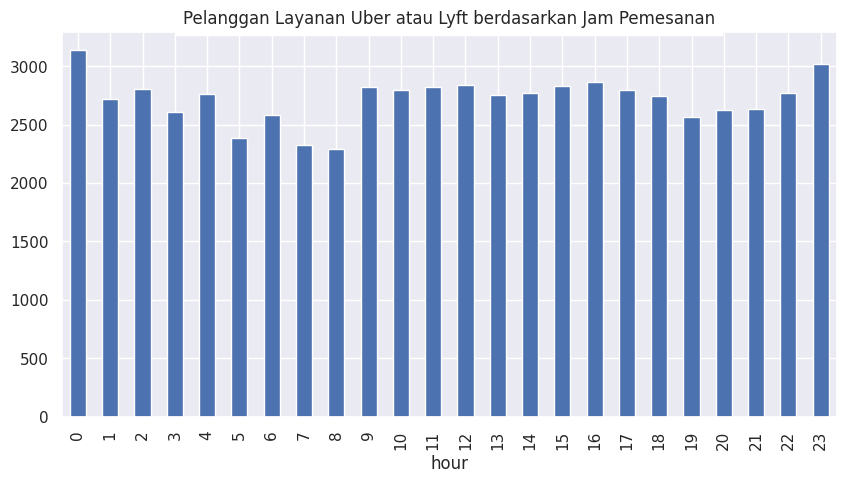

In [15]:
grouped1 = data[['hour']].groupby(['hour']).agg({'hour':'count'})
grouped1.plot(kind='bar', legend=False, figsize=(10,5))

#customize plot
plt.title("Pelanggan Layanan Uber atau Lyft berdasarkan Jam Pemesanan", bbox={'facecolor':'1', 'pad':5})

#menampilkan plot
plt.show()

Dari visualisasi data di atas, dapat dilihat bahwa pelanggan banyak memesan layanan Uber atau Lyft pada jam 11 dan 12 malam. Sedangkan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore juga terlihat bahwa jumlah pelanggan cenderung stabil.

In [16]:
data['source'].value_counts().head(5)

Theatre District      5686
Haymarket Square      5658
Beacon Hill           5604
West End              5565
Financial District    5505
Name: source, dtype: int64

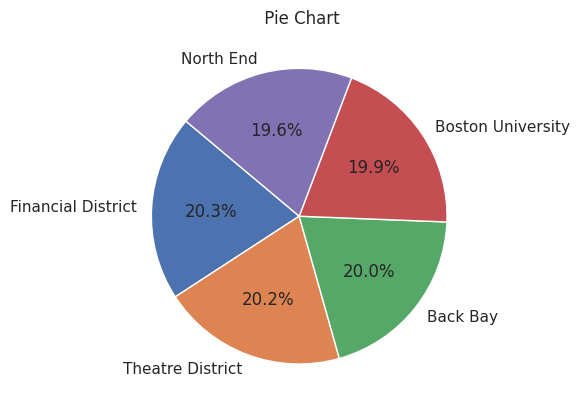

In [18]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Boston University', 'North End']

plt.pie(data['source'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)

#customize plot
plt.title(' Pie Chart')

#menampilkan plot
plt.show()

In [19]:
grouped2 = data.groupby(['source']).agg(Count=('source','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped2

,source,Count,Price
2,Boston University,5254,18.598306
4,Financial District,5505,18.049682
3,Fenway,5222,17.823056
8,Northeastern University,5441,17.509006
10,Theatre District,5686,16.384717
7,North Station,5375,16.039721
11,West End,5565,15.993261
9,South Station,5239,15.649933
0,Back Bay,5372,15.630305
1,Beacon Hill,5604,15.579943


Telihat  hasil dari groupby titik awal pemesanan di atas, terlihat bahwa pemesanan paling banyak dilakukan dari Financial District. Sedangkan pemesanan paling sedikit dilakukan pada North Station. Tetapi rata-rata harga dari layanan yang paling tinggi adalah pemesanan yang dilakukan di Boston University dan harga rata-rata termurah dari layanan Uber atau Lyft adalah di Haymarket Square.

In [20]:
data['destination'].value_counts().head(5)

Northeastern University    5758
North End                  5659
Haymarket Square           5603
Fenway                     5600
Boston University          5576
Name: destination, dtype: int64

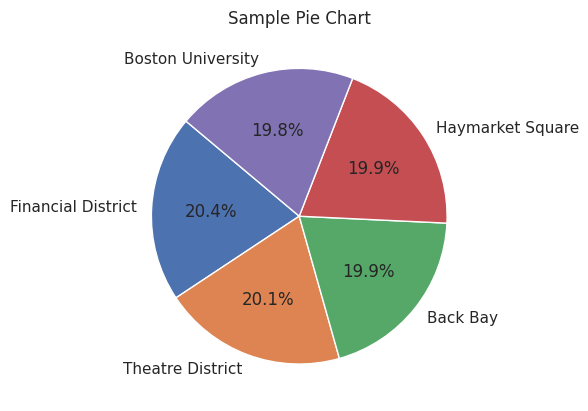

In [21]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University']

plt.pie(data['destination'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)

#customize plot
plt.title('Sample Pie Chart')

#menampilkan
plt.show()


In [22]:
grouped3 = data.groupby(['destination']).agg(Count=('destination','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped3

,destination,Count,Price
2,Boston University,5576,18.503138
3,Fenway,5600,17.878036
4,Financial District,5380,17.645167
8,Northeastern University,5758,17.370962
7,North Station,5370,16.558287
0,Back Bay,5318,16.118184
1,Beacon Hill,5530,16.061392
11,West End,5028,15.884248
10,Theatre District,5522,15.868435
6,North End,5659,14.915621


Terlihat hasil dari groupby titik tujuan dari layanan Uber atau Lyft,  terlihat bahwa tujuan pelanggan paling banyak ke Financial District. tetapi untuk rata-rata harga tertinggi adalah pesanan layanan Uber / Lyft ke tujuan Boston University

**Data Correlation**

<ipython-input-23-3d28f2604587>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".3f")


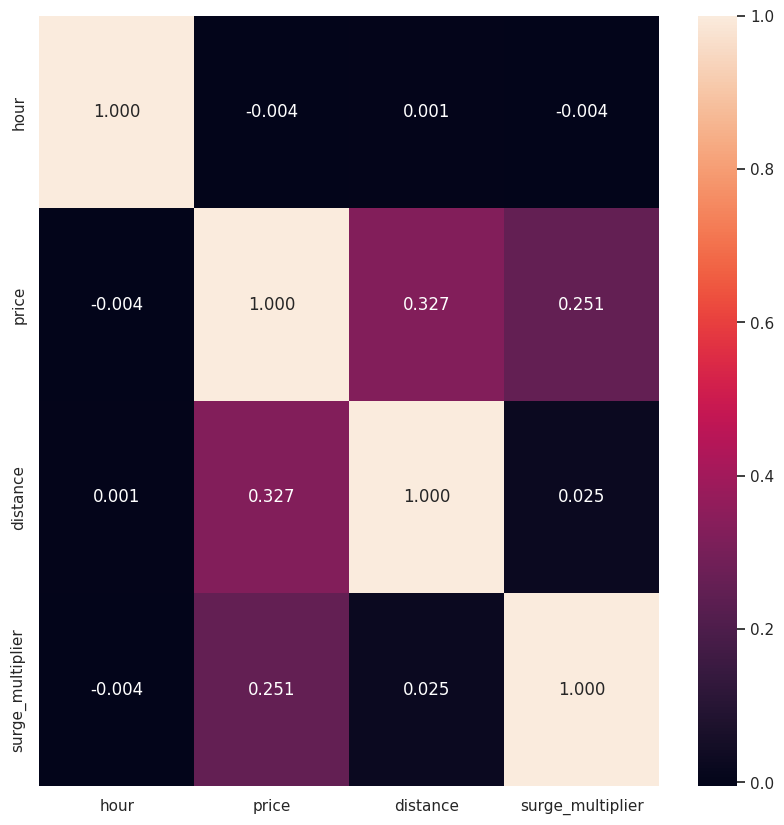

In [23]:
# Create a heatmap

fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()


Dari Heatmap di atas, variabel yang memiliki korelasi terkuat dengan price adalah distance dan surge_multiplier.

**Multicollinearity**

In [24]:


def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif



In [25]:
iv = data [['surge_multiplier', 'distance']]
calc_vif(iv)

,Variables,VIF
0,surge_multiplier,4.592669
1,distance,4.592669


karena nilai VIF masih dibawah 5, maka tidak terdapat multikolinearitas antara distance dan surge_multiplier

# **F. Data Preprocessing**

In [26]:
data1 = data[['name', 'price', 'distance', 'surge_multiplier', 'cab_type']]
data1

,name,price,distance,surge_multiplier,cab_type
0,Shared,5.0,0.44,1.00,Lyft
1,Lux,11.0,0.44,1.00,Lyft
2,Lyft,7.0,0.44,1.00,Lyft
3,Lux Black XL,26.0,0.44,1.00,Lyft
4,Lyft XL,9.0,0.44,1.00,Lyft
...,...,...,...,...,...
65250,WAV,8.0,1.91,1.00,Uber
65251,Taxi,13.5,1.80,1.00,Uber
65252,Lux Black,27.5,2.48,1.25,Lyft
65253,Lux Black XL,38.5,2.48,1.25,Lyft


**Label encoding**

In [27]:
categorical = data1[['cab_type','name']]

In [28]:
for i in categorical:
    dummies = pd.get_dummies(data1[i], prefix=i, drop_first=True)
    data1 = pd.concat([data1, dummies], axis=1)
    data1 = data1.drop([i], axis = 1)

In [29]:
data1

,price,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.00,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.00,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65250,8.0,1.91,1.00,1,0,0,0,0,0,0,0,0,0,0,0,1
65251,13.5,1.80,1.00,1,0,0,0,0,0,0,0,1,0,0,0,0
65252,27.5,2.48,1.25,0,0,0,1,0,0,0,0,0,0,0,0,0
65253,38.5,2.48,1.25,0,0,0,0,1,0,0,0,0,0,0,0,0


**Split Data**

In [30]:
train, test = train_test_split(data1, test_size=0.3, random_state=11)
train_index = train.index
test_index = test.index

In [31]:
x_train = train.drop(['price'], axis=1)
y_train = train[['price']]

x_test = test.drop(['price'], axis=1)
y_test = test[['price']]

**Scale Data**


In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **G. Definisi dan Pelatihan Model**

 Disini kita akan menggunakan model Linear Regression karena dari data diatas akan dilakukan prediksi harga layanan Uber atau Lyft. Variabel independen dari data ini adalah name, cab_type, surge_multiplier dan distance dan  variabel dependen dari dataset ini adalah price.

In [33]:
LR = LinearRegression()
model = LR.fit(x_train, y_train)

# **H. Evaluasi Model**

In [34]:
r_sq_train = model.score(x_train,y_train)
print('Coefficient of determination training data:',r_sq_train)
r_sq_test = model.score(x_test,y_test)
print('Coefficient of determination testing data:',r_sq_test)
print('Intercept:',model.intercept_)
print('Slope:',model.coef_)

Coefficient of determination training data: 0.9203472112345364
Coefficient of determination testing data: 0.9173932989370731
Intercept: [16.27084154]
Slope: [[ 2.87139452  1.68114085  1.15452615  2.62011329 -0.2789095   1.10313723
   3.54925821 -2.41310407 -0.92217215 -3.21693984 -1.88452849 -3.15926268
  -2.86812449 -1.30667772 -2.88215323]]


Dari hasil evaluasi diatas, didapatkan  akurasi dari training data adalah sebesar 92.08% dan akurasi dari testing data adalah sebesar 92.19%. Karena akurasi testing data lebih besar dibandingkan training data, maka model ini termasuk overfitting walaupun selisih dari akurasi tidak terlalu signifikan.

**Membandingkan model Linear Regression dengan Random Forest Regression**

--**Random Forest Regression Menggunakan Hyperparameter Tuning**

In [35]:
y_train = y_train.to_numpy().ravel()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


RandomForestRegressor(max_depth=9, max_features='sqrt', max_leaf_nodes=9)

Dari GridSearchCV diatas, didapatkan model yang terbaik menggunakan max depth 9, max features log2, max leaf nodes 9 dan n extimators 150.

In [36]:
rf_reg_tune = RandomForestRegressor(max_depth=9,
                               max_features='log2',
                               max_leaf_nodes=9,
                               n_estimators=150)
rf_reg_tune.fit(x_train, y_train)

train_pred_y_tune = rf_reg_tune.predict(x_train)
test_pred_y_tune = rf_reg_tune.predict(x_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y_tune)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y_tune)}")
print('Model Score :', rf_reg_tune.score(x_test, y_test))

train_MAE = 3.4606823616750795
test_MAE = 3.5490507681421866
Model Score : 0.7348830394270414


Setelah melakukan model menggunakan hyperparameter tuning, didapatkan mean squared error testing yang lebih kecil dibandingkan training data,maka model ini termasuk overfitting.Accuracy yang didapatkan dari model Random Forest Regression menggunakan hyperparameter tuning hanya 76.33%.

--**Random Forest Regression Tanpa Menggunakan Hyperparameter Tuning**

In [37]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)

rf_reg.fit(x_train, y_train)

train_pred_y = rf_reg.predict(x_train)
test_pred_y = rf_reg.predict(x_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")
print('Model Score :', rf_reg.score(x_test, y_test))

train_MAE = 0.9348960036467777
test_MAE = 1.1022821813786383
Model Score : 0.9624148387549073


Setelah melakukan model tanpa hyperparameter tuning didapatkan Mean Absolute Error untuk testing data lebih tinggi dibandingkan training data, maka model ini termasuk overfitting. Accuracy yang didapatkan menggunakan metode ini  sebesar 95.69% .

*Dari ketiga data diatas, model dengan akurasi yang paling bagus adalah Random Forest Regression tanpa menggunakan hyperparameter tuning. Maka dari itu akan dilakukan model inference dengan model tersebut.*

# **Model Deployment and Inference**

In [38]:
filename = 'RandomForestReg.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

In [39]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9624148387549073


In [40]:
y_pred = loaded_model.predict(x_test)
test['Estimated Y'] = np.round(y_pred,2)
test

,price,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,Estimated Y
21343,24.0,2.80,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,23.80
64245,13.5,1.08,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,13.50
48751,30.0,2.46,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,31.39
23348,18.5,1.50,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,13.77
7798,9.0,1.30,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,12.0,3.12,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,10.22
17994,5.5,0.49,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.69
60687,15.0,1.00,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,15.78
12100,26.0,3.26,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,26.76


# **K. Kesimpulan**

Pesanan pelanggan layanan Uber atau Lyft paling banyak berada pada jam 11 dan 12 malam. Sedangkan pesanan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore terlihat pesanan pelanggan cenderung stabil.

Dari regresi linier, didapatka persamaan sebagai berikut:


---


**y= 2.79767806e+00r1 + 1.63185850e+00r2 + 9.96802243e+13r3 + 2.  
     52518395e+00r4 + 5.34409507e+13r5 + 5.19983948e+13r6 + 5.24740815e+13r7 + 5.15166805+13r8 + 5.28771389e+13r9 + 5.31103049e+13r10 + -1.91000536e+00r11 + -3.18526737e+00r12 + -2.95894749e+00r13 + -1.34813918e+00r14 + -2.94343264e+00r15**

---







dimana y adalah price dan x1 : distance x2 : surge_multiplier x3 : cab_type_Uber x4 : name_Black SUV x5 : name_Lux x6 : name_Lux Black x7 : name_Lux Black XL x8 : name_Lyft x9 : name_Lyft XL x10 : name_Shared x11 : name_Taxi x12 : name_UberPool x13 : name_UberX x14 : name_UberXL x15 : name_WAV

Dari model regresi linear diatas didapatkan akurasi sebesar 92.19% untuk testing data. Setelah melakukan pemodelan menggunakan model Regresi Linear, dilakukan pemodelan menggunakan Random Forest Regression.



1.   Tidak menggunakan hyperparameter tuning : model masih overfitting, akurasi yang didapatkan sebesar 95.69%
2.   Menggunakan hyperparameter tuning : model tidak overfitting namun akurasi yang didapatkan sebesar 76.33%



Maka dari itu, model deployment dan inference dilakukan menggunakan model Random Forest Regression karena model tersebut memiliki akurasi yang paling tinggi.